## Reto 5: Distribución de ratings de las películas más valoradas

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - `merge`
        - Creación de filtros usando `apply`
    
---
    
### 2. Desarrollo:

#### a) Creando un box plot de distribución de ratings

Vamos a ver cómo están distribuidos los ratings de las películas más valoradas de nuestro dataset. La siguiente es una lista de las películas que tienen más de 2500 valoraciones en nuestro dataset:

`[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]`

Realiza los siguientes pasos:

1. Lee tus archivos `ratings` y `movies`.
2. Obtén una lista con los ids de las películas con más de 2500 valoraciones.Debe ser igual a la lista de arriba.
3. Crea una función que tome una lista de ids y un id y regrese `True` si el id se encuentra en la lista (puedes usar el operador `in` de Python).
4. Usa `apply` para aplicar esa función a la columna `ratings['movie_id']` y obtener un filtro.
5. Usa tu filtro para filtrar el `DataFrame` `ratings` y quedarte solamente con las entradas de las películas que fueron valoradas más de 2500 veces.
6. Usando `merge` agrega los nombres de las películas a tu `DataFrame` `ratings`. Asigna el resultado a la variable `ratings_filtrados_con_nombre`.

> **Nota** el paso #4 es algo complejo. Si tienes dificultades para realizarlo, ¡no dudes en pedirle ayuda a tu experta!

In [2]:
# Tu código va aquí
# Vamos a ver cómo están distribuidos los ratings de las películas más valoradas de nuestro dataset.
#  La siguiente es una lista de las películas que tienen más de 2500 valoraciones en nuestro dataset:
#
#[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]
#
# Realiza los siguientes pasos:

# 1. Lee tus archivos `ratings` y `movies`.

# Cargamos librerías
import pandas as pd

# Cargamos los archivos
ratings = pd.read_csv('../../Datasets/MovieLens/ratings-raw.csv', index_col= 0)
movies = pd.read_csv('../../Datasets/MovieLens/movies-separated_by_money-raw.csv', index_col= 0, sep= '$')

In [3]:
# Contenido de ratings
ratings.head(3)

,movie_id,rating,timestamp
user_id,,,
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968


In [4]:
# Contenido de movies
movies.head(3)

,title,genres
movie_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance


In [5]:

# 2. Obtén una lista con los ids de las películas con más de 2500 valoraciones.Debe ser igual a la lista de arriba.
valoraciones_movies = ratings.groupby('movie_id').count().sort_values('rating', ascending= False)

movies_mas_2500_val = valoraciones_movies[valoraciones_movies['rating'] > 2500]
movies_mas_2500_val_list = list(movies_mas_2500_val.index)

movies_mas_2500_val_list

[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]

In [6]:
# 3. Crea una función que tome una lista de ids y un id y regrese `True` si el id se encuentra en la lista 
# (puedes usar el operador `in` de Python).
def movie_found(lista_id, movie_id):
    return movie_id in lista_id

In [9]:
# 4. Usa `apply` para aplicar esa función a la columna `ratings['movie_id']` y obtener un filtro.
filtro_movies = ratings['movie_id'].apply(lambda x: movie_found(movies_mas_2500_val_list, x))

(1000209, 3)

In [16]:

# 5. Usa tu filtro para filtrar el `DataFrame` `ratings` y quedarte solamente 
# con las entradas de las películas que fueron valoradas más de 2500 veces.
rating_filtro = ratings[filtro_movies]
print('Tamaño original: ',ratings.shape)
print('Tamaño filtrado: ',rating_filtro.shape)
rating_filtro

Tamaño original:  (1000209, 3)
Tamaño filtrado:  (35582, 3)


,movie_id,rating,timestamp
user_id,,,
1,1270,5,978300055
1,260,4,978300760
1,2028,5,978301619
1,608,4,978301398
2,1210,4,978298151
...,...,...,...
6040,1198,3,956715455
6040,2571,4,997454126
6040,1210,2,956715805


In [20]:

# 6. Usando `merge` agrega los nombres de las películas a tu `DataFrame` `ratings`.
#  Asigna el resultado a la variable `ratings_filtrados_con_nombre`.
ratings_filtrados_con_nombre = pd.merge(rating_filtro, movies, left_on= 'movie_id', right_index= True)
ratings_filtrados_con_nombre


,movie_id,rating,timestamp,title,genres
user_id,,,,,
1,1270,5,978300055,Back to the Future (1985),Comedy|Sci-Fi
1,260,4,978300760,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
1,2028,5,978301619,Saving Private Ryan (1998),Action|Drama|War
1,608,4,978301398,Fargo (1996),Crime|Drama|Thriller
2,1210,4,978298151,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
...,...,...,...,...,...
6040,1198,3,956715455,Raiders of the Lost Ark (1981),Action|Adventure
6040,2571,4,997454126,"Matrix, The (1999)",Action|Sci-Fi|Thriller
6040,1210,2,956715805,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War


Pídele a tu experta la función de verificación `visualizar_boxplots` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado. Tu `DataFrame` debe de tener una columna `title` y otra `rating` para que la visualización pueda funcionar:

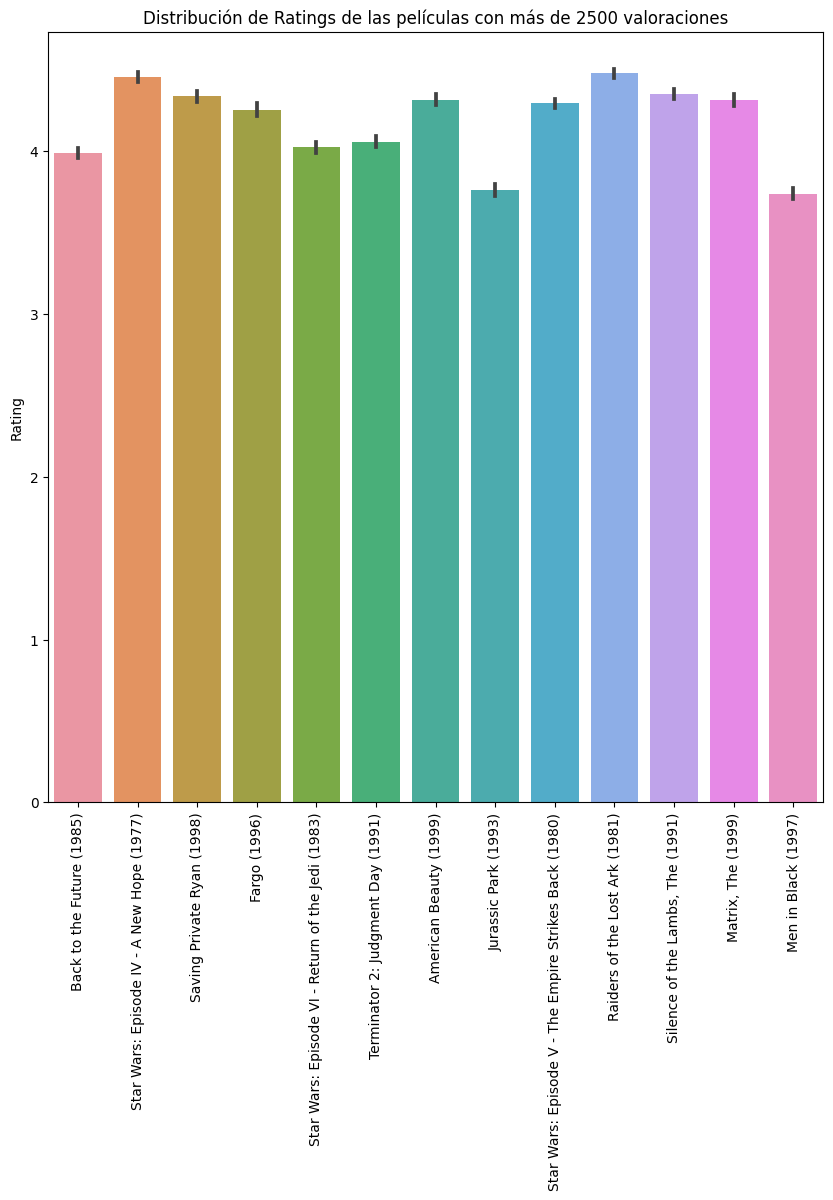

In [23]:
# Pega aquí la función de verificación 
def visualizar_boxplots(ratings_filtrados_con_nombre):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Distribución de Ratings de las películas con más de 2500 valoraciones')
    plot = sns.barplot(data= ratings_filtrados_con_nombre, x='title', y= 'rating', ax=ax)
    ax.set(xlabel=None, ylabel='Rating')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

visualizar_boxplots(ratings_filtrados_con_nombre)

<details><summary>Solución</summary>

```python
ratings = pd.read_csv('../../Datasets/MovieLens/ratings-raw.csv')
movies = pd.read_csv('../../Datasets/MovieLens/movies-separated_by_money-raw.csv', sep='$', index_col=0)
conteo_de_valoraciones = ratings['movie_id'].value_counts()
filtro_de_pelis_valoradas_mas_de_2500_veces = conteo_de_valoraciones > 2500
conteo_de_pelis_valoradas_mas_de_2500_veces = conteo_de_valoraciones[filtro_de_pelis_valoradas_mas_de_2500_veces]
ids_de_pelis_valoradas_mas_de_2500_veces = conteo_de_pelis_valoradas_mas_de_2500_veces.index
def id_esta_en_lista_de_ids(lista_de_ids, id_):
    return id_ in lista_de_ids
filtro_de_ratings = ratings['movie_id'].apply(lambda x: id_esta_en_lista_de_ids(ids_de_pelis_valoradas_mas_de_2500_veces, x))
ratings_filtrados = ratings[filtro_de_ratings]
ratings_filtrados_con_nombre = pd.merge(ratings_filtrados, movies['title'], left_on='movie_id', right_index=True)
```
    
</details>